# 케라스 창시자에게 배우는 딥러닝
## 3장
### 3.6절 주택 가격 예측: 회귀문제

### 3.6.1 보스턴 주택 가격 데이터 셋 import

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 8us/step


In [2]:
print("train data shape: ", train_data.shape)
print("test data shape: ", test_data.shape)

print("train target shape: ", train_targets.shape)
print("test target shape: ", test_targets.shape)

train data shape:  (404, 13)
test data shape:  (102, 13)
train target shape:  (404,)
test target shape:  (102,)


In [3]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

### 3.6.3 모델 구성

In [6]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

### 3.6.4 K-겹 검증을 사용한 훈련검증

In [8]:
import numpy as np

k = 5
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('처리중인 폴드 numer: ', i)
    val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], 
                                         train_data[(i+1)*num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                           train_targets[(i+1)*num_val_samples:]],
                                          axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 numer:  0
처리중인 폴드 numer:  1
처리중인 폴드 numer:  2
처리중인 폴드 numer:  3
처리중인 폴드 numer:  4


In [9]:
all_scores

[2.1183276653289793,
 2.9654828548431396,
 2.17912015914917,
 2.4496556758880614,
 2.5877090454101563]

In [13]:
np.mean(all_scores)

2.460059080123901

In [18]:
import numpy as np

k = 5
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories=[]

for i in range(k):
    print('처리중인 폴드 numer: ', i)
    val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i+1)*num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], 
                                         train_data[(i+1)*num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                           train_targets[(i+1)*num_val_samples:]],
                                          axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, 
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 numer:  0
처리중인 폴드 numer:  1
처리중인 폴드 numer:  2
처리중인 폴드 numer:  3
처리중인 폴드 numer:  4


In [21]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

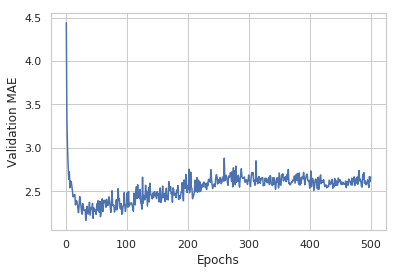

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

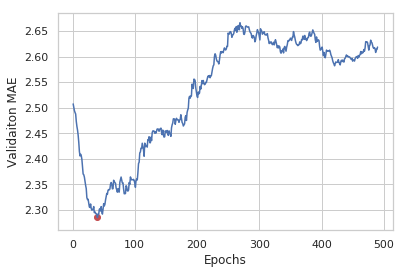

In [29]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.scatter(smooth_mae_history.index(min(smooth_mae_history)), min(smooth_mae_history), c='r')
plt.xlabel('Epochs')
plt.ylabel('Validaiton MAE')
plt.show()

In [30]:
smooth_mae_history.index(min(smooth_mae_history))

39

In [39]:
model = build_model()
model.fit(train_data, train_targets,
         epochs=79, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [40]:
test_mae_score

3.0463968258278045